# Fourier Transform and Image Processing

# Packages

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import signal
!pip install wget
import wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load Image

Load and prepare an image from an URL

Loaded image : cat.jpg
Image shape : (256, 170, 3)


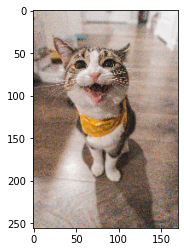

In [2]:
# User parameters
URL_IMAGE = "https://images.unsplash.com/photo-1543852786-1cf6624b9987"
MAX_DIM = 256 # maximum width/height after rescaling image

# Download image
image_filepath = "cat.jpg"
if not os.path.exists(image_filepath):
    wget.download(URL_IMAGE, image_filepath)

# Prepare image
image_data = cv2.cvtColor(cv2.imread(image_filepath), cv2.COLOR_BGR2RGB)
max_dim = max(image_data.shape[0:2])
rescaled_image_width = int(image_data.shape[1] / max_dim * MAX_DIM)
rescaled_image_height = int(image_data.shape[0] / max_dim * MAX_DIM)
dim = (rescaled_image_width, rescaled_image_height)
image_data = cv2.resize(image_data, dim)

# Show image
plt.imshow(image_data)

# Summary
print(f"Loaded image : {image_filepath}")
print(f"Image shape : {image_data.shape}")

# Image to DFT (space domain $\rightarrow$ frequency domain)

Compute the 2-dimensional discrete Fourier transform. 

**2D Discrete Fourier Transform**

\begin{align}
X(u,v) = \frac{1}{MN} \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}x(x,y)e^{-j2\pi(\frac{u}{M}x+\frac{v}{N}y)} 
\end{align}

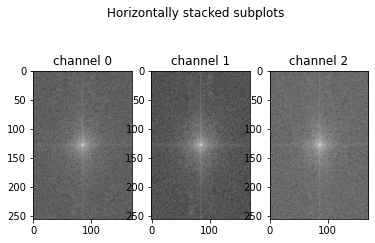

In [3]:
def image_to_dft(image_data):
    """ Convert image into dft coefficients
    args:
        image_data (numpy.array) : image of shape (H,W,C)
    return:
        numpy.array : complex numpy array of shape (C,H,W)
    """
    num_channels = image_data.shape[-1]
    fft_coefs = []
    for i in range(num_channels):
        # Note : Using Fast Fourier Transform much faster than DFT
        fft_coef = np.fft.fft2(image_data[:,:,i])
        fft_coefs.append(fft_coef)
    return np.asarray(fft_coefs)

def show_dft(fft_coefs):
    """ Show dft coefficients
    args:
        fft_coefs (numpy.array) : complex numpy array of shape (C,H,W)
    """
    num_channels = fft_coefs.shape[0]
    fig, ax = plt.subplots(1, num_channels)
    fig.suptitle('Horizontally stacked subplots')
    for i in range(num_channels):
        # Note : fftshift helps to visualize a Fourier transform with 
        # the zero-frequency component in the middle of the spectrum
        ax[i].imshow(np.log(np.abs(np.fft.fftshift(fft_coefs[i]))), cmap='gray')
        ax[i].set_title(f'channel {i}')

# Compute result
fft_coefs = image_to_dft(image_data)
show_dft(fft_coefs)

# DFT to Image (frequency domain $\rightarrow $ space domain)

Recover the image from the 2-dimensional inverse discrete Fourier transform.

**2D Inverse Discrete Fourier Transform**

\begin{align}
x(x,y) = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}X(u,v)e^{j2\pi(\frac{u}{M}x+\frac{v}{N}y)}
\end{align}

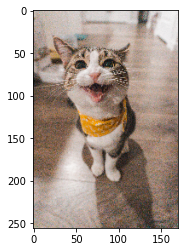

In [4]:
def dft_to_image(fft_coefs):
    """ Convert dft coefficients into image
    args:
        fft_coefs (numpy.array) : complex numpy array of shape (C,H,W)
    return:
        numpy.array : image of shape (H,W,C)
    """
    num_channels = fft_coefs.shape[0]
    channels = []
    for i in range(num_channels):
        channel_data = np.fft.ifft2(fft_coefs[i])
        channels.append(np.abs(channel_data))
    
    # stack the channels together and convert back to uint8
    return np.stack(channels, axis=2).astype(np.uint8)

# Compute result
image_data_from_dft = dft_to_image(fft_coefs)
plt.imshow(image_data_from_dft)

#  Butterworth Filter

In this example, we eliminate low frequency with Butterworth Filter


**Resources**
- https://www.mathworks.com/help/signal/ref/butter.html
- https://www.geeksforgeeks.org/matlab-butterworth-lowpass-filter-in-image-processing/
- https://en.wikipedia.org/wiki/Butterworth_filter#Transfer_function
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html


## Introduction to Butterworth Filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

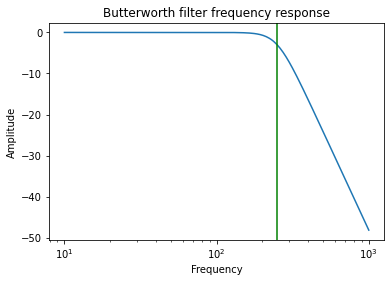

In [5]:
# Visualization of a one dimensional Butterworth filter
filter_order = 4
cutt_off_frequency = 250
b, a = signal.butter(filter_order, cutt_off_frequency, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.axvline(cutt_off_frequency, color='green') # cutoff frequency
plt.show()

## Using Butterworth Filter on image

In [6]:
# TODO - implement butterworth filter on image

## Convolution in Frequency Domain

In [7]:
# TODO - implement convolution on frequency domain